### Applying Linear, Lasso and Ridge model on automobile prices to detect and compare

In [1]:
import pandas as pd

In [2]:
auto_data_df = pd.read_csv("imports-85.data", sep="," , engine= "python")

In [3]:
auto_data_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


### This dataset has 26 variables(fields).

### Checking the null values and replacing all "?" values with Nan (using Numpy's replace method)

In [4]:
import numpy as np
auto_data_df = auto_data_df.replace('?', np.nan)

In [5]:
auto_data_df.describe()          ##5-point summary of numerical fields

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
auto_data_df.describe(include='all')          ##show all summary for all variable, even for non-numerical,shows Nan

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,7957
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


#### To check a particular column's data type and its information

In [7]:
auto_data_df['make'].describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

#### converting the data type of field , from object to numeric

In [8]:
 ## conversion throws an error when non-numeric value is found. Error='coerce' ignores data conversion errors
auto_data_df['price'] = pd.to_numeric(auto_data_df['price'], errors = 'coerce')    

In [9]:
auto_data_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### Dropping the unnecessary columns

In [10]:
auto_data_df = auto_data_df.drop(['normalized-losses'],axis =1)

In [11]:
auto_data_df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [12]:
auto_data_df['body-style'].describe()     ##description of body-style field

count       205
unique        5
top       sedan
freq         96
Name: body-style, dtype: object

In [13]:
auto_data_df['body-style'].value_counts()   ##5 categories of car style, with their count

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [14]:
auto_data_df['body-style'].isna().value_counts()     ##to count the null values, false means no null value

False    205
Name: body-style, dtype: int64

#### Replacing body-style types with numbers, using dict type

In [15]:
body_style_dict = { "sedan": 1, "hatchback": 2, "wagon":3 , "hardtop":4,"convertible":5}
auto_data_df['body-style'].replace(body_style_dict, inplace=True)

cylinders_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data_df['num-of-cylinders'].replace(cylinders_dict, inplace=True)

In [16]:
auto_data_df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,5,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,5,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,2,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,1,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,1,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


#### Applying One-Hot Encoding on non-numeric fields 

In [17]:
auto_data_df = pd.get_dummies(auto_data_df, 
                              columns= ['make','fuel-type','num-of-doors',
                                        'drive-wheels','engine-location','fuel-system','aspiration','engine-type'])

In [18]:
auto_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   body-style             205 non-null    int64  
 2   wheel-base             205 non-null    float64
 3   length                 205 non-null    float64
 4   width                  205 non-null    float64
 5   height                 205 non-null    float64
 6   curb-weight            205 non-null    int64  
 7   num-of-cylinders       205 non-null    int64  
 8   engine-size            205 non-null    int64  
 9   bore                   201 non-null    object 
 10  stroke                 201 non-null    object 
 11  compression-ratio      205 non-null    float64
 12  horsepower             203 non-null    object 
 13  peak-rpm               203 non-null    object 
 14  city-mpg               205 non-null    int64  
 15  highwa

#### In above info, dataset now has 58 columns, with field value associated with names like 'engine-location_front' and 'engine-location_rear'

#### calculate any missing values in dataset now

In [19]:
auto_data_df[auto_data_df.isnull().any(axis=1)]

,symboling,body-style,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,fuel-system_spfi,aspiration_std,aspiration_turbo,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
9,0,2,99.5,178.2,67.9,52.0,3053,5,131,3.13,...,0,0,1,0,0,0,1,0,0,0
44,1,1,94.5,155.9,63.6,52.0,1874,4,90,3.03,...,0,1,0,0,0,0,1,0,0,0
45,0,1,94.5,155.9,63.6,52.0,1909,4,90,3.03,...,0,1,0,0,0,0,1,0,0,0
55,3,2,95.3,169.0,65.7,49.6,2380,2,70,NaN,...,0,1,0,0,0,0,0,0,0,1
56,3,2,95.3,169.0,65.7,49.6,2380,2,70,NaN,...,0,1,0,0,0,0,0,0,0,1
57,3,2,95.3,169.0,65.7,49.6,2385,2,70,NaN,...,0,1,0,0,0,0,0,0,0,1
58,3,2,95.3,169.0,65.7,49.6,2500,2,80,NaN,...,0,1,0,0,0,0,0,0,0,1
129,1,2,98.4,175.7,72.3,50.5,3366,8,203,3.94,...,0,1,0,0,1,0,0,0,0,0
130,0,3,96.1,181.5,66.5,55.2,2579,4,132,3.46,...,0,1,0,0,0,0,1,0,0,0
131,2,2,96.1,176.8,66.6,50.5,2460,4,132,3.46,...,0,1,0,0,0,0,1,0,0,0


#### Dropping null values

In [20]:
auto_data_df = auto_data_df.dropna()

#### Data wrangling is complete, now build model on data tp predict the price of car
#### Creating training and test data using Scikit learn model, by importing train_test_split module

In [24]:
# dropping 'Price' field as we will predict this price using linear regression model
# 'Price' will be considered as Y-axis(Target variable) and rest of the fields with values will be considered as X-axis(Independent variables) data
from sklearn.model_selection import train_test_split

X_data = auto_data_df.drop("price" , axis=1)

Y_data = auto_data_df['price']

## taking 80% of data for training the model and 20% will be used for testing the model
x_train,x_test,y_train,y_test = train_test_split(X_data, Y_data, train_size=0.2, random_state=0)

#### Since in the above code, training and test data is created, now we build the model. we start by creating Linear regression model

Linear regression involves fitting a line using a slope as well as an intercept.

An estimator is a high level API that scikit-learn offers which implements the fit method.
Any object in scikit-learn which learns from data which can be trained is an estimator.
Here Linear Regression is our estimator object and we call the fit method passing in the X data as well as the Y variables to start the training process for this estimator.

In [26]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)


LinearRegression()

#### Once the model is fit with traiing data, now we need to calculate R2, which measures how good is regression line is fit by calling the score method on linear model

In [27]:
linear_model.score(x_train, y_train)

0.9951298812668283

#### Coefficients of eac column/feature can be viewed using command below-

In [28]:
linear_model.coef_

array([ 2.44257923e+03, -9.69294226e+02,  4.71425355e+01,  3.21084318e+02,
        1.06204920e+03, -1.26902014e+03,  1.32612618e+01,  1.07887867e+04,
       -1.37968405e+02, -4.61440808e+03, -2.14295709e+03, -3.26010666e+03,
       -1.00635903e+02,  3.71997265e+00, -9.91041955e+01,  3.26763259e+02,
       -1.33336471e-08,  8.60495675e-09, -7.56291272e+03, -5.11772669e-09,
       -2.53637520e+03, -2.32287174e+03, -7.82438292e-09,  9.94259608e-09,
        3.24868828e+03,  2.05563577e+04,  2.67318683e-08, -5.04038448e+03,
        2.15032056e+03,  1.38231343e+03, -7.75574397e+03, -8.17635737e-10,
        2.18278728e-11,  4.07193423e+03,  4.72937245e-11,  1.42226671e+03,
       -8.64049209e+03,  1.02689926e+03,  1.27258950e+04, -1.27258950e+04,
        1.42705622e+02, -1.42705622e+02,  0.00000000e+00, -1.36762981e+03,
        1.36762981e+03,  0.00000000e+00,  0.00000000e+00, -2.32287174e+03,
       -6.02874645e+03,  0.00000000e+00,  1.27258950e+04,  0.00000000e+00,
        7.79480531e+01, -

#### A better view of the coefficients.
List of features and their coefficients, ordered by coefficient value

Checking the weights alone gives us no information.
Checking the weights associated with a particular feature are really useful.
This association will allow us to see how much weight that is given to a particular feature in the final regression model.
We can see what factors really drive the price of automobiles.

In [33]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

engine-type_ohcv     -15161.964387
fuel-type_gas        -12725.895037
make_volkswagen       -8640.492088
make_plymouth         -7755.743971
make_bmw              -7562.912723
                          ...     
engine-type_ohc        9707.716724
num-of-cylinders      10788.786681
fuel-system_idi       12725.895037
fuel-type_diesel      12725.895037
make_mercedes-benz    20556.357728
Length: 64, dtype: float64


###### From the above output, we can see

Some features are associated with negative coefficients which means these features are negatively correlated to the price. Cars with these features are cheaper.
The coefficient of certain features are very small, very close to zero, which means these features have very little effect on the vehicle price.
The highest coefficients are associated with those features which drive up the price of a vehicle.We can plot Bar diag for these coefficients to see that visually.

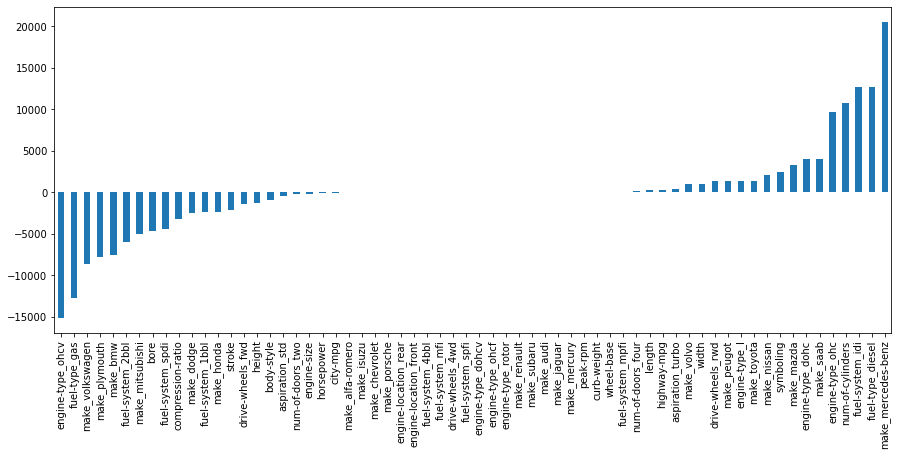

In [46]:
coef.plot(kind="bar")
plt.show()                   ##field with the high bars have high impact on predicting the target variable 

#### Making prediction on train data

Let us now use this model for prediction.
Estimators have the predict function which you can call in order to predict with an input data set.
X_test data set is test data. The predicted prices of the automobiles will be stored in Y_predict.

In [34]:
y_predict = linear_model.predict(x_test)

#### now we need to compare the y_predict with y_test as how good our model is on predicting the price

Populating the interactive namespace from numpy and matplotlib


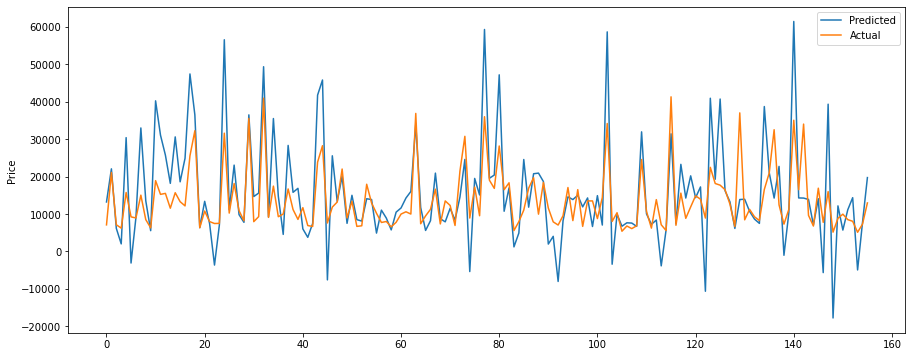

In [40]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(y_predict, label='Predicted')
plt.plot( y_test.values, label="Actual")
plt.ylabel('Price')
plt.legend()
plt.show()

#### In the above diag. we see Predicted values are more than the actual values.
#### let's calculate the R2 for test data

In [41]:
r2score_test_data = linear_model.score(x_test, y_test)
print(r2score_test_data)

-0.3758162151807163


#### This is very very low. Lets check other parameters for checking our model's correctness


### Calculate Mean square error

<li>The mean square error is the objective function of the ordinary least squares method of regression.</li>

In [42]:
from sklearn.metrics import mean_squared_error

linear_model_mser  = mean_squared_error(y_predict, y_test)
linear_model_mser

91135906.74995172

The mean square error is calculated on the predicted labels and the actual labels and the mean square error for our model is of the order of  more than 91 million.

#### Root of Mean Square Error (RMSE)

<li>
    RMSE is the square root of the mean square error that we just calculated above.
</li>
<li>
    The root mean square error describes on average how much our predicted label will differ from the actual label.
 </li>

In [44]:
import math
linear_model_rmse = math.sqrt(linear_model_mser)
linear_model_rmse

9546.512805729206

<li>The RMSE is around 9,546 for our model which means on average the price predicted by our model is around 9546 dollars away from the actual price. </li>
<li>This can be in the positive or negative direction.</li>

#### now implementing Lasso, Ridge and Elastic Net regression models

In [60]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.5, normalize = True)
lasso_model.fit(x_train,y_train)

lasso_predictors = x_train.columns
lasso_coef = pd.Series(lasso_model.coef_, lasso_predictors).sort_values()
print(lasso_coef)
#lasso_coef.plot(kind = "bar")
#plt.show()

#checking score of this model
lasso_score = lasso_model.score(x_train, y_train)
lasso_score

aspiration_std        -4486.989291
make_peugot           -3380.651871
engine-type_ohcv      -3166.736015
make_plymouth         -2814.666046
make_volkswagen       -1589.486167
                          ...     
make_toyota            2793.918819
make_nissan            3132.549613
make_bmw               3196.201230
make_mazda             5322.062169
make_mercedes-benz    29351.894826
Length: 64, dtype: float64


0.9939923323041024

#### Now predicting price from Lasso model and then comparing the actual and predicted price

Populating the interactive namespace from numpy and matplotlib


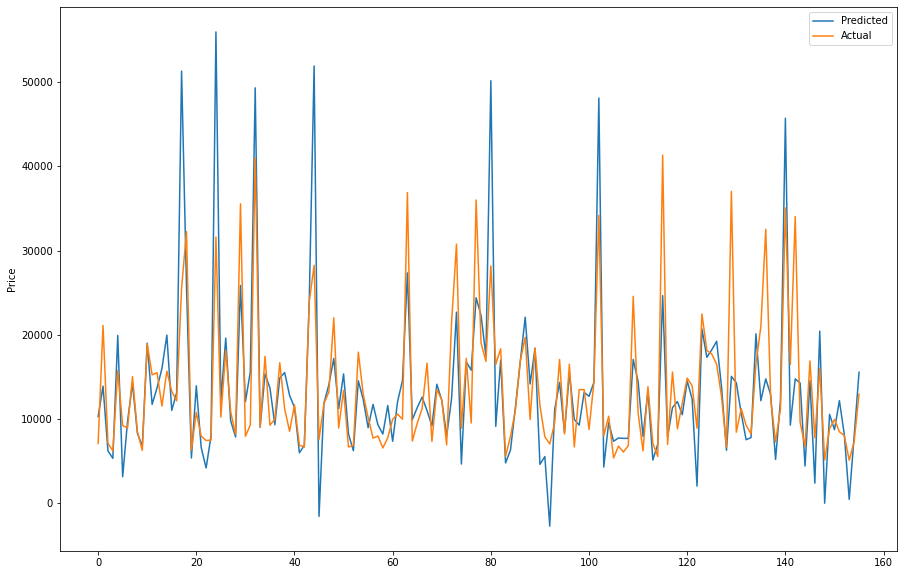

In [65]:
y_lasso_predict = lasso_model.predict(x_test)

%pylab inline
#compare predicted and actual price values by drawing the chart
pylab.rcParams['figure.figsize'] = (15,10)

plt.plot(y_lasso_predict, label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()


#### calculating R2 and MSE, RMSE on Lasso model to see if its any btr

In [68]:
lasso_r2 = lasso_model.score(x_test,y_test)
lasso_mse = mean_squared_error(y_lasso_predict,y_test)
lasso_mse

39084063.11786306

In [69]:
lasso_rmse = math.sqrt(lasso_mse)
lasso_rmse

6251.724811431087

#### Root Mean Square error value is 6251 , which means predicted price has a diff of +-6251 from the original price

### Ridge regression analysis

Cost Function: RSS + α*(sum of squares of coefficients)

RSS = Residual Sum of Squares

Larger values of α should result in smaller coefficients as the cost function needs to be minimized

Ridge Regression penalizes large coefficients even more than Lasso as coefficients are squared in cost function

#### we already have x_test,y_test,x_train and y_train data. We will use this to train our model and then evaluate

ridge coef engine-type_l         -3970.271687
make_peugot           -3970.271687
make_volkswagen       -2132.914036
stroke                -1721.365677
make_volvo            -1526.900276
                          ...     
make_mazda             1458.297809
aspiration_turbo       1496.108720
bore                   2052.759251
make_bmw               2067.424691
make_mercedes-benz    14210.318430
Length: 64, dtype: float64 

ridge r2 score  0.9855611725270627 

rdige mse -  17265248.000699785 
 
ridge rmse -  4155.147169559676 



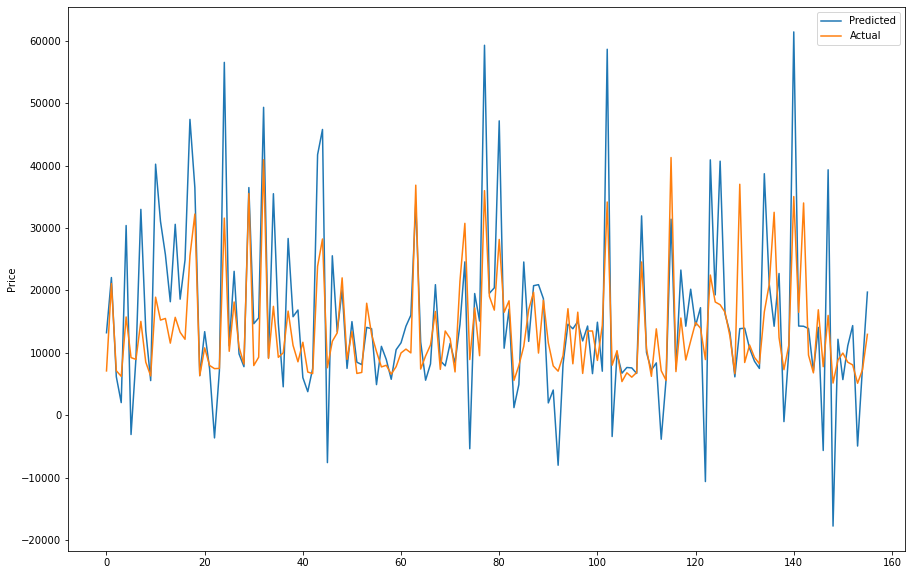

In [88]:
from sklearn.linear_model import Ridge

# training the model
ridge_model = Ridge(alpha=0.05, normalize=True)
ridge_model.fit(x_train,y_train)

ridge_predictors = x_train.columns

#checking coefficients
ridge_coef = pd.Series(ridge_model.coef_,ridge_predictors).sort_values()
print("ridge coef" , ridge_coef,"\n")

#predicting target variable
y_ridge_predict = ridge_model.predict(x_test)

## evaluating r2, mse and rmse
ridge_r2_score = ridge_model.score(x_train,y_train)
print("ridge r2 score ", ridge_r2_score,"\n" )

ridge_mse = mean_squared_error(y_ridge_predict, y_test)
print("rdige mse - ",ridge_mse,"\n ")

ridge_rmse = math.sqrt(ridge_mse)
print("ridge rmse - ",ridge_rmse,"\n" )

##plotting predicted and test target variable

pylab.rcParams['figure.figsize'] = (15,10)
plt.plot(y_predict, label= "Predicted")
plt.plot(y_test.values, label="Actual")
plt.ylabel('Price')
plt.legend()
plt.show()